#  Sustainable Development Goals (SDG) Index Analysis

## Introduction
This notebook focuses on analyzing the **Sustainable Development Goals (SDG) Index dataset (2000–2022)**. 
The SDG Index tracks global progress toward the **United Nations’ 17 Sustainable Development Goals**, 
providing both overall index scores and individual goal scores for each country and year.

### Objectives:
1. Load and clean the dataset.  
2. Explore its structure and check for missing/duplicate values.  
3. Perform **exploratory data analysis (EDA)** to identify patterns and distributions.  
4. Build a **Linear Regression model** to predict SDG Index scores using goal-wise scores.  
5. Evaluate model performance using metrics such as **R², MAE, and RMSE**.

This process helps us understand the dataset better and assess the feasibility of using 
machine learning to forecast sustainable development trends.


## 1 – Import Libraries & Load Dataset
This step imports the required Python libraries and loads the SDG dataset. We also print the dataset shape and display the first few rows to confirm successful loading.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv(r"C:\Users\Koushik Kumar\OneDrive\Desktop\Shell\week 1\sdg_index_2000-2022.csv")


print("Dataset shape:", df.shape)
df.head()



Dataset shape: (4140, 21)


,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


##  2 – Dataset Overview
Here we explore the dataset: check info, summary statistics, missing values, and duplicates to assess data quality.

In [2]:

df.info()


df.describe()

df.isnull().sum()

df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,ZWE,Zimbabwe,2018,55.9,26.4,46.6,39.8,57.9,76.7,51.6,...,63.8,23.5,32.4,79.2,94.6,94.1,0.0,76.4,45.5,45.6
4136,ZWE,Zimbabwe,2019,53.7,21.4,46.0,40.6,60.6,77.0,51.3,...,62.8,23.8,24.0,58.6,94.6,94.2,0.0,76.4,44.0,44.5
4137,ZWE,Zimbabwe,2020,54.3,20.1,47.2,41.5,62.0,77.0,51.1,...,62.9,25.4,24.0,60.0,94.6,94.3,0.0,76.4,44.6,46.0
4138,ZWE,Zimbabwe,2021,54.8,20.8,48.4,41.9,62.5,77.1,51.1,...,63.1,27.0,24.0,61.2,94.5,94.3,0.0,77.9,43.1,48.1


##  3 – Feature & Target Selection
We define the **features (X)** as SDG goal scores and the **target (y)** as the overall SDG index score. The data is then split into training and testing sets.

In [3]:

X = df[[col for col in df.columns if col.startswith("goal_")]]

y = df["sdg_index_score"]


##  4 – Model Training (Linear Regression)
We initialize and train a **Linear Regression** model using the training data.

In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 5 – Model Prediction
Using the trained model, we generate predictions on the test dataset.

In [5]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)





,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
import joblib
import os

# Path to your project folder (where app.py is located)
project_path = r"C:\Users\Koushik Kumar\OneDrive\Desktop\Shell"

# Full model path
model_path = os.path.join(project_path, "week2_FINAL.pkl")

# Save the trained RandomForest model
joblib.dump(lr_model, model_path)

print(f"✅ Model saved at: {model_path}")

✅ Model saved at: C:\Users\Koushik Kumar\OneDrive\Desktop\Shell\week2_FINAL.pkl


In [7]:
y_pred = lr_model.predict(X_test)

##  6 – Model Evaluation
We evaluate the model’s performance using metrics such as **MSE, MAE, RMSE, and R²**.

In [8]:

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("MSE:", mse)


R² Score: 0.990349166744817
RMSE: 1.0895055434835106
MAE: 0.866472967172251
MSE: 1.1870223292812998


##  7 – Visualization of Predictions
We plot the actual vs predicted SDG index scores to visually assess model accuracy.

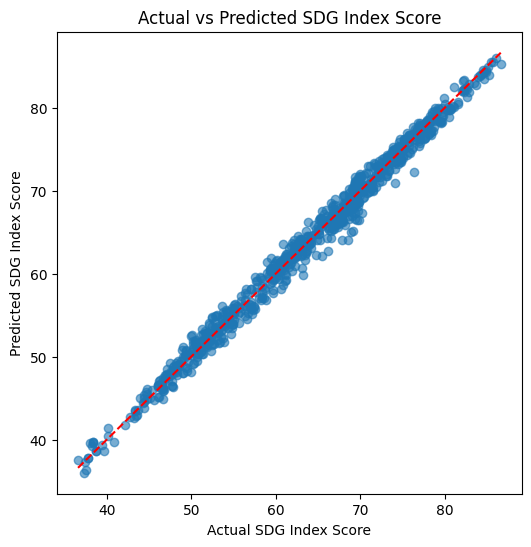

In [9]:

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual SDG Index Score")
plt.ylabel("Predicted SDG Index Score")
plt.title("Actual vs Predicted SDG Index Score")
plt.show()


##  8 – Residual Analysis
We calculate and plot residuals (errors) to check model assumptions and bias.

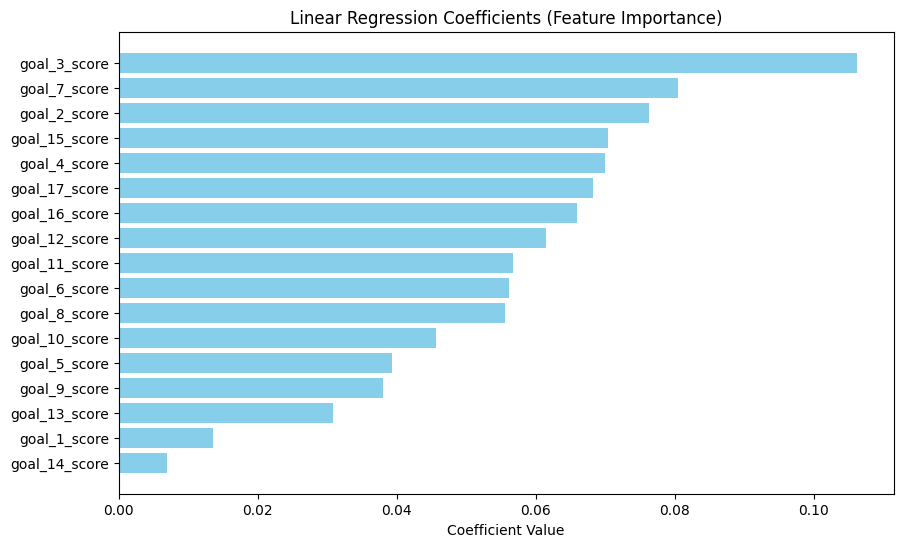

,Goal,Coefficient
2,goal_3_score,0.106213
6,goal_7_score,0.080518
1,goal_2_score,0.076294
14,goal_15_score,0.070431
3,goal_4_score,0.069999
16,goal_17_score,0.068219
15,goal_16_score,0.065957
11,goal_12_score,0.061574
10,goal_11_score,0.056767
5,goal_6_score,0.056234


In [10]:

coefficients = pd.DataFrame({
    "Goal": X.columns,
    "Coefficient": lr_model.coef_
}).sort_values(by="Coefficient", ascending=False)


plt.figure(figsize=(10,6))
plt.barh(coefficients["Goal"], coefficients["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.title("Linear Regression Coefficients (Feature Importance)")
plt.gca().invert_yaxis()
plt.show()

coefficients
